# Hotel Bookings

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#using colab notebook
url = 'hotel_bookings.csv'

# #using jupyter notebook
# url = 'hotel_bookings.csv'

df = pd.read_csv(url)

In [3]:
pd.options.display.max_columns = None
df.head(2)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01


In [4]:
dfDesc = []
for i in df.columns:
    dfDesc.append([df[i].dtypes,
                   len(df[i].dropna()),
                   df[i].isna().sum(),
                   round((((df[i].isna().sum())/(len(df)))*100),2),
                   df[i].nunique(),
                   df[i].value_counts().sort_values(ascending=False).index[0],
                   list(df[i].value_counts())[0]])
    
pd.DataFrame(dfDesc, columns = ['dataType', 'count', 'null', 'null%', 'unique', 'top', 'freq'], index = df.columns.values)

,dataType,count,null,null%,unique,top,freq
hotel,object,119390,0,0.00,2,City Hotel,79330
is_canceled,int64,119390,0,0.00,2,0,75166
lead_time,int64,119390,0,0.00,479,0,6345
arrival_date_year,int64,119390,0,0.00,3,2016,56707
arrival_date_month,object,119390,0,0.00,12,August,13877
arrival_date_week_number,int64,119390,0,0.00,53,33,3580
arrival_date_day_of_month,int64,119390,0,0.00,31,17,4406
stays_in_weekend_nights,int64,119390,0,0.00,17,0,51998
stays_in_week_nights,int64,119390,0,0.00,35,2,33684
adults,int64,119390,0,0.00,14,2,89680


# Exploratory Data Analysis

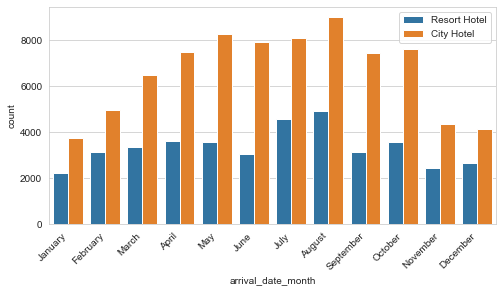

In [5]:
# Arrival date based on type of hotel
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = 'arrival_date_month', hue='hotel', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.legend(loc='upper right')
plt.show()

The data provides more City Hotel type rather than Resort Hotel type

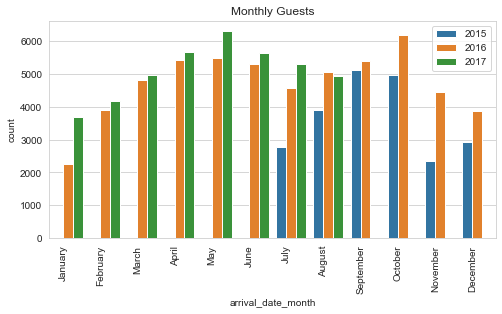

In [6]:
# Monthly Guests per year
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df, x = 'arrival_date_month', hue='arrival_date_year', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.legend(loc='upper right')
plt.title('Monthly Guests')
plt.show()

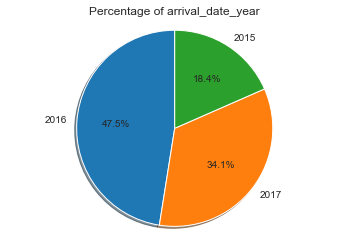

In [7]:
# Percentage of data from each year
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(pd.DataFrame(df['arrival_date_year'].value_counts()).index)
sizes = list(pd.DataFrame(df['arrival_date_year'].value_counts())['arrival_date_year'])

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Percentage of arrival_date_year')
plt.show()

The percentage of the data based on the year is not equally distributed since the collection of data was from **July 2015 - August 2017**

Therefore 2016 is used to analyze a yearly characteristics of the data

### 2016

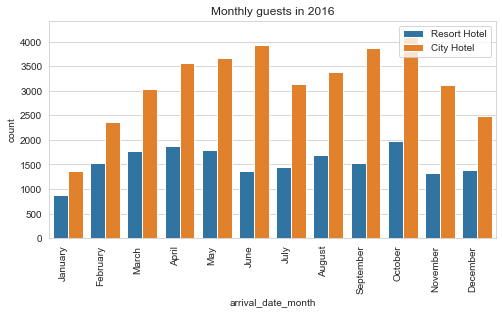

In [8]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df[df['arrival_date_year']==2016], x = 'arrival_date_month', hue='hotel', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.legend(loc='upper right')
plt.title('Monthly guests in 2016')

plt.show()

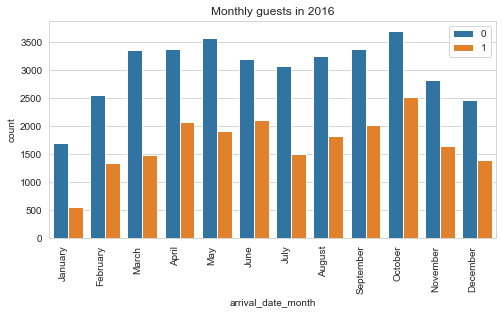

In [9]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df[df['arrival_date_year']==2016], x = 'arrival_date_month', hue='is_canceled', order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.legend(loc='upper right')
plt.title('Monthly guests in 2016')
plt.show()

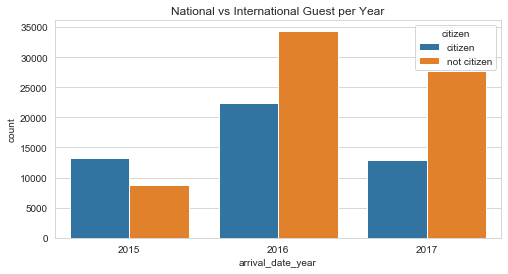

[Text(0, 0, '2015'), Text(1, 0, '2016'), Text(2, 0, '2017')]

In [10]:
def local_not(cols):
    if cols == 'PRT':
        return 'citizen'
    else:
        return 'not citizen'
    
df_plot = df.copy()
df_plot['citizen'] = df_plot['country'].apply(local_not)

plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot, x = 'arrival_date_year', hue = 'citizen')
plt.title('National vs International Guest per Year')
plt.show()
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

Text(0.5, 1.0, 'Local vs International Guest 2016 (Canceled/Not Canceled)')

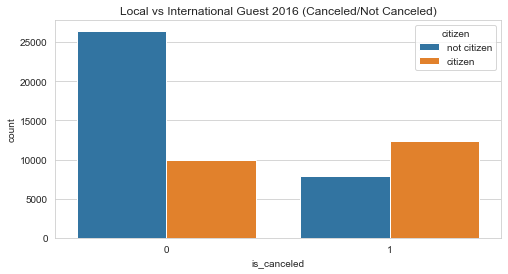

In [11]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot[df_plot['arrival_date_year']==2016], x = 'is_canceled', hue = 'citizen')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Local vs International Guest 2016 (Canceled/Not Canceled)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

In [12]:
df.groupby('deposit_type')['is_canceled'].value_counts()

deposit_type  is_canceled
No Deposit    0              74947
              1              29694
Non Refund    1              14494
              0                 93
Refundable    0                126
              1                 36
Name: is_canceled, dtype: int64

**Same Room and Different Room Comparison**

In [13]:
same_room = []
diff_room = []
for idx, val in enumerate(df['reserved_room_type']):
    if(val == df_plot['assigned_room_type'][idx]):
        same_room.append(idx)
    else:
        diff_room.append(idx)
len(df_plot.iloc[same_room])

104473

In [14]:
len(df_plot.iloc[diff_room])

14917

is_canceled based on deposit type

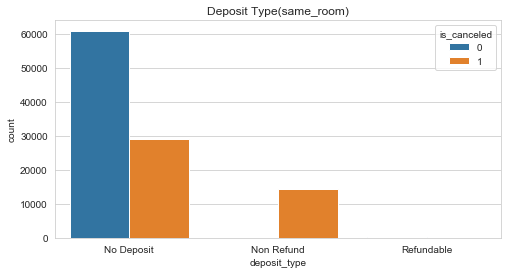

is_canceled  deposit_type
0            No Deposit      60878
             Refundable         91
             Non Refund         82
1            No Deposit      28970
             Non Refund      14417
             Refundable         35
Name: deposit_type, dtype: int64


In [15]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot.iloc[same_room], x = 'deposit_type', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Deposit Type(same_room)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

print(df_plot.iloc[same_room].groupby('is_canceled')['deposit_type'].value_counts())

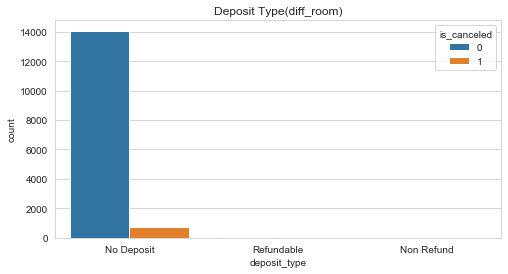

is_canceled  deposit_type
0            No Deposit      14069
             Refundable         35
             Non Refund         11
1            No Deposit        724
             Non Refund         77
             Refundable          1
Name: deposit_type, dtype: int64


In [16]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot.iloc[diff_room], x = 'deposit_type', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Deposit Type(diff_room)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
print(df_plot.iloc[diff_room].groupby('is_canceled')['deposit_type'].value_counts())

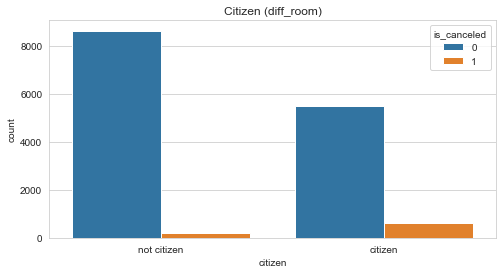

is_canceled  citizen    
0            not citizen    8619
             citizen        5496
1            citizen         613
             not citizen     189
Name: citizen, dtype: int64


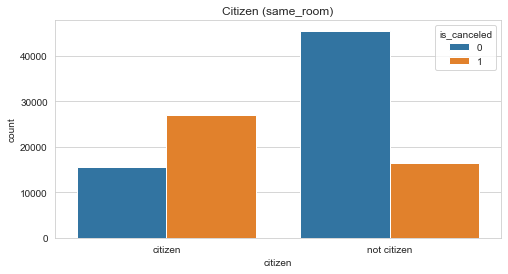

is_canceled  citizen    
0            not citizen    45476
             citizen        15575
1            citizen        26906
             not citizen    16516
Name: citizen, dtype: int64


In [17]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot.iloc[diff_room], x = 'citizen', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Citizen (diff_room)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
print(df_plot.iloc[diff_room].groupby('is_canceled')['citizen'].value_counts())


plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot.iloc[same_room], x = 'citizen', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Citizen (same_room)')
# ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
print(df_plot.iloc[same_room].groupby('is_canceled')['citizen'].value_counts())

It seems that guests with rooms that are different than their original booking room type have more cancelation than those that have different room types.

## ADR

<Figure size 432x288 with 0 Axes>

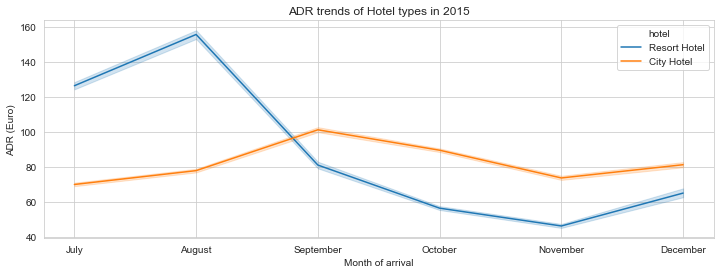

<Figure size 432x288 with 0 Axes>

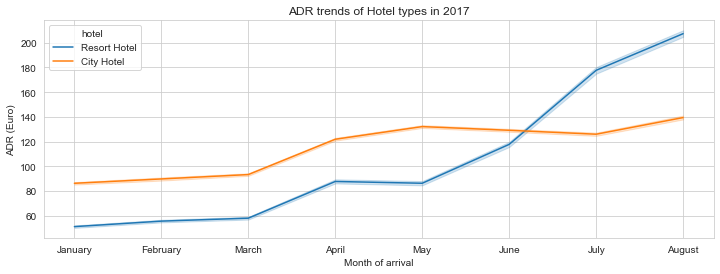

<Figure size 432x288 with 0 Axes>

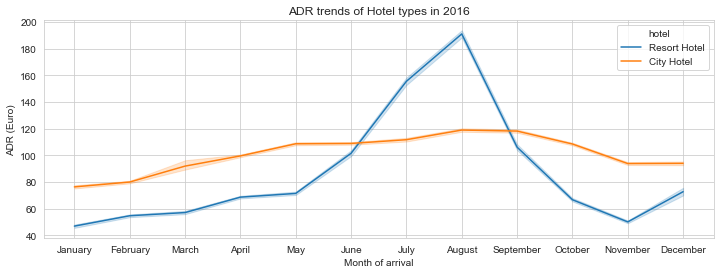

In [18]:
df_plot_adr = df_plot[df_plot['arrival_date_year']==2015].sort_values('arrival_date_week_number')
fig = plt.figure()

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
ax = sns.lineplot(data = df_plot_adr, x = 'arrival_date_month',y = 'adr', hue = 'hotel', sort=False)#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('ADR trends of Hotel types in 2015')
ax.set(xlabel='Month of arrival', ylabel='ADR (Euro)')

df_plot_adr = df_plot[df_plot['arrival_date_year']==2017].sort_values('arrival_date_week_number')
fig = plt.figure()

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
ax = sns.lineplot(data = df_plot_adr, x = 'arrival_date_month',y = 'adr', hue = 'hotel', sort=False)#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('ADR trends of Hotel types in 2017')
ax.set(xlabel='Month of arrival', ylabel='ADR (Euro)')

df_plot_adr = df_plot[df_plot['arrival_date_year']==2016].sort_values('arrival_date_week_number')
fig = plt.figure()

plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
ax = sns.lineplot(data = df_plot_adr, x = 'arrival_date_month',y = 'adr', hue = 'hotel', sort=False)#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('ADR trends of Hotel types in 2016')
ax.set(xlabel='Month of arrival', ylabel='ADR (Euro)')

plt.show()

<Figure size 432x288 with 0 Axes>

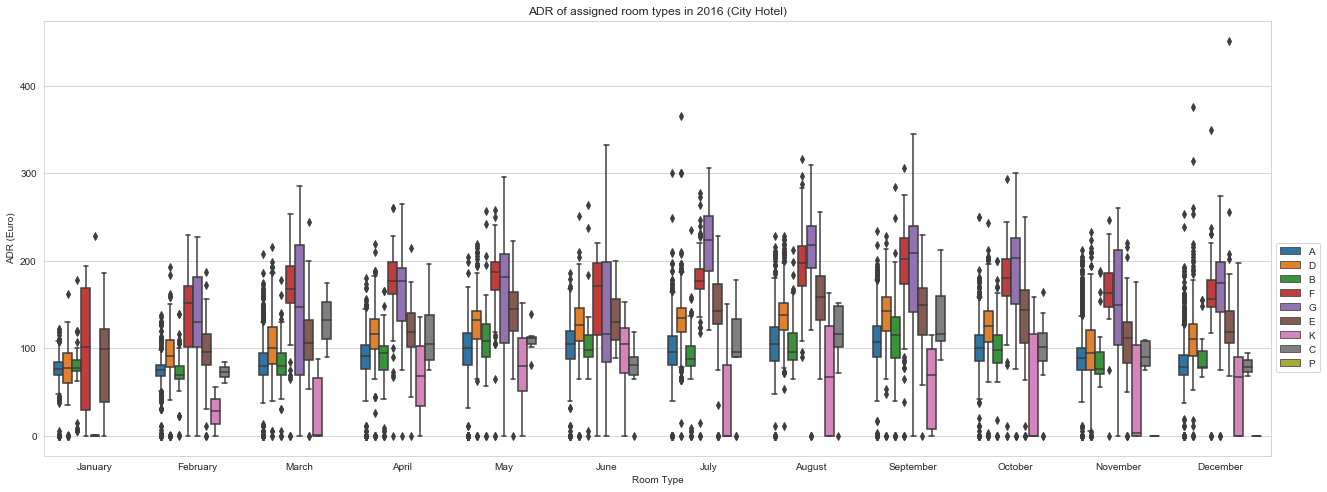

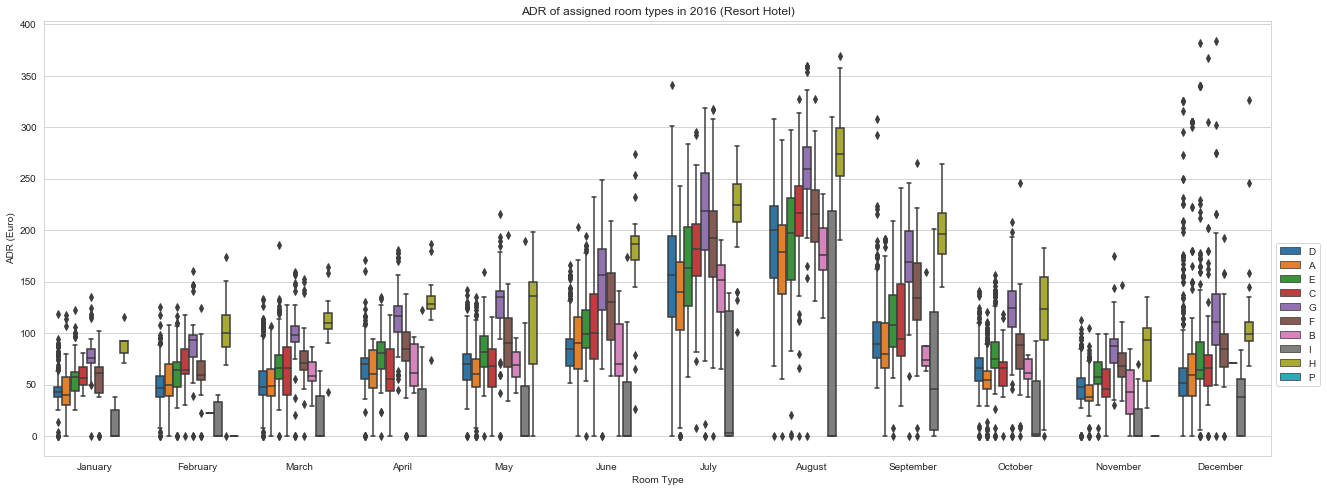

City Hotel
A    26828
D     7467
B     1277
F     1030
E      969
G      344
K      141
C       79
P        4
Name: assigned_room_type, dtype: int64

Resort Hotel
A    7861
D    4936
E    2605
C     905
G     866
F     769
H     339
I     215
B      69
P       2
Name: assigned_room_type, dtype: int64


In [19]:
df_plot_adr = df_plot[(df_plot['adr']<5000) & (df_plot['arrival_date_year']==2016)].sort_values('reserved_room_type')
fig = plt.figure()

# plt.subplot(2, 1, 2)
plt.figure(figsize=(22,8))
sns.set_style("whitegrid")
ax = sns.boxplot(data = df_plot_adr[df_plot_adr['hotel']=='City Hotel'], x = 'arrival_date_month',
                 hue='assigned_room_type', y = 'adr', 
                 order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('ADR of assigned room types in 2016 (City Hotel)')
ax.set(xlabel='Room Type', ylabel='ADR (Euro)')
ax.legend(bbox_to_anchor=(1, 0.5),loc=2)

# plt.subplot(2, 1, 2)
plt.figure(figsize=(22,8))
sns.set_style("whitegrid")
ax = sns.boxplot(data = df_plot_adr[df_plot_adr['hotel']=='Resort Hotel'], x = 'arrival_date_month', 
                 hue='assigned_room_type', y = 'adr', 
                order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('ADR of assigned room types in 2016 (Resort Hotel)')
ax.set(xlabel='Room Type', ylabel='ADR (Euro)')
ax.legend(bbox_to_anchor=(1, 0.5),loc=2)
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

print('City Hotel')
print(df_plot_adr[df_plot_adr['hotel']=='City Hotel']['assigned_room_type'].value_counts())
print('\nResort Hotel')
print(df_plot_adr[df_plot_adr['hotel']=='Resort Hotel']['assigned_room_type'].value_counts())

<Figure size 432x288 with 0 Axes>

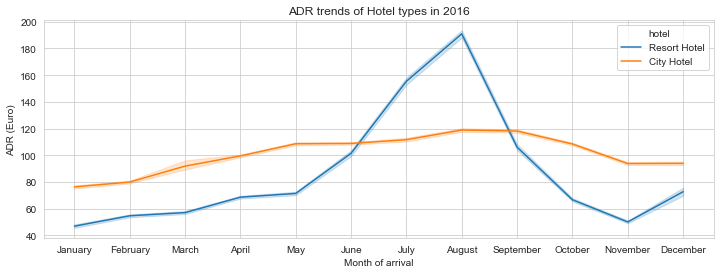

In [20]:
df_plot_adr = df_plot[df_plot['arrival_date_year']==2016].sort_values('arrival_date_week_number')
fig = plt.figure()

# plt.subplot(2, 1, 1)
plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
ax = sns.lineplot(data = df_plot_adr, x = 'arrival_date_month',y = 'adr', hue = 'hotel', sort=False)#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('ADR trends of Hotel types in 2016')
ax.set(xlabel='Month of arrival', ylabel='ADR (Euro)')
plt.show()

The highest ADR for 2016 is at August, this is possibly because the summer vacation. Since Portugal is a country best visited during the Summer. Portugal is known for its beaches and old towns, so its best to visit the country during the Summer.

<Figure size 432x288 with 0 Axes>

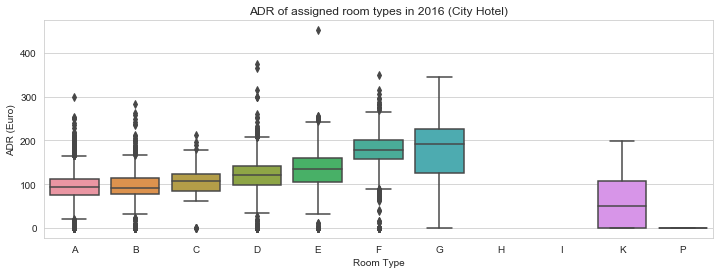

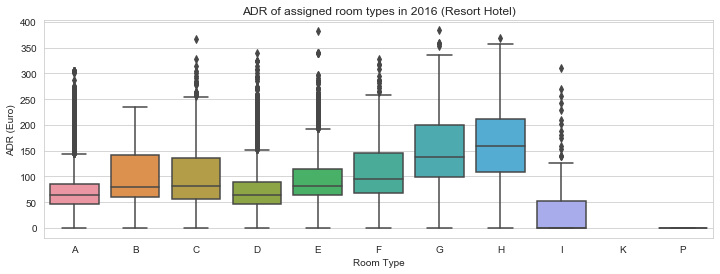

City Hotel
A    26828
D     7467
B     1277
F     1030
E      969
G      344
K      141
C       79
P        4
Name: assigned_room_type, dtype: int64

Resort Hotel
A    7861
D    4936
E    2605
C     905
G     866
F     769
H     339
I     215
B      69
P       2
Name: assigned_room_type, dtype: int64


In [21]:
df_plot_adr = df_plot[(df_plot['adr']<5000) & (df_plot['arrival_date_year']==2016)].sort_values('reserved_room_type')
fig = plt.figure()

# plt.subplot(2, 1, 2)
plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
ax = sns.boxplot(data = df_plot_adr[df_plot_adr['hotel']=='City Hotel'], x = 'assigned_room_type',
                 y = 'adr', order=['A','B','C','D','E','F','G','H','I','K','P'])
plt.title('ADR of assigned room types in 2016 (City Hotel)')
ax.set(xlabel='Room Type', ylabel='ADR (Euro)')

# plt.subplot(2, 1, 2)
plt.figure(figsize=(12,4))
sns.set_style("whitegrid")
ax = sns.boxplot(data = df_plot_adr[df_plot_adr['hotel']=='Resort Hotel'], x = 'assigned_room_type',
                 y = 'adr', order=['A','B','C','D','E','F','G','H','I','K','P'])
plt.title('ADR of assigned room types in 2016 (Resort Hotel)')
ax.set(xlabel='Room Type', ylabel='ADR (Euro)')

plt.show()

print('City Hotel')
print(df_plot_adr[df_plot_adr['hotel']=='City Hotel']['assigned_room_type'].value_counts())
print('\nResort Hotel')
print(df_plot_adr[df_plot_adr['hotel']=='Resort Hotel']['assigned_room_type'].value_counts())

The ADR of hotels per room in a year (2016)

- From the graph above, it can be seen that A room type is the most chosen room type by the guests in both city and resort hotels
- Room type G has the highest ADR for city hotel, whereas room type H has the highest ADR for resort hotel


## Market Segment

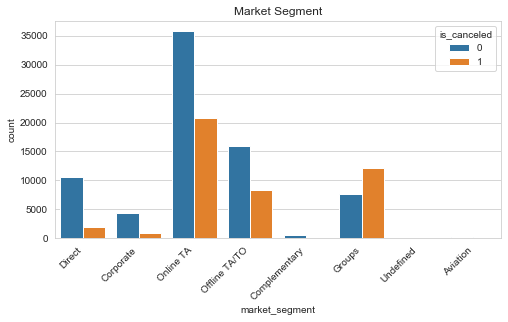

is_canceled  market_segment
0            Online TA         35738
             Offline TA/TO     15908
             Direct            10672
             Groups             7714
             Corporate          4303
             Complementary       646
             Aviation            185
1            Online TA         20739
             Groups            12097
             Offline TA/TO      8311
             Direct             1934
             Corporate           992
             Complementary        97
             Aviation             52
             Undefined             2
Name: market_segment, dtype: int64


In [22]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
ax = sns.countplot(data = df_plot, x = 'market_segment', hue = 'is_canceled')#, order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
plt.title('Market Segment')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()
print(df_plot.groupby('is_canceled')['market_segment'].value_counts())

## Finding which Agency have a high cancellation

In [49]:
print('Top 10 Agencies that cancelled on Resort Hotel')
print(df[(df['market_segment']=='Online TA') & (df['is_canceled']==1) & (df['hotel']=='Resort Hotel')]['agent'].value_counts().nlargest(10))

print('Top 10 Agencies that does not cancel on Resort Hotel')
print(df[(df['market_segment']=='Online TA') & (df['is_canceled']==0) & (df['hotel']=='Resort Hotel')]['agent'].value_counts().nlargest(10))

Top 10 Agencies that cancelled on Resort Hotel
240.0    5477
242.0     254
241.0     235
314.0     110
5.0        32
15.0       25
175.0      21
147.0      18
196.0      14
184.0      11
Name: agent, dtype: int64
Top 10 Agencies that does not cancel on Resort Hotel
240.0    8400
241.0    1472
242.0     511
314.0     426
147.0      81
196.0      67
5.0        63
175.0      43
339.0      43
184.0      41
Name: agent, dtype: int64


In [50]:
print('Top 10 Agencies that cancelled on City Hotel')
print(df[(df['market_segment']=='Online TA') & (df['is_canceled']==1) & (df['hotel']=='City Hotel')]['agent'].value_counts().nlargest(10))

print('Top 10 Agencies that does not cancel on City Hotel')
print(df[(df['market_segment']=='Online TA') & (df['is_canceled']==0) & (df['hotel']=='City Hotel')]['agent'].value_counts().nlargest(10))

Top 10 Agencies that cancelled on City Hotel
9.0      13262
7.0        474
8.0        388
83.0       114
10.0        61
85.0        30
11.0        30
195.0       29
86.0        22
15.0        16
Name: agent, dtype: int64
Top 10 Agencies that does not cancel on City Hotel
9.0      18691
7.0       3065
8.0        848
11.0       260
83.0       249
10.0       185
152.0      130
195.0      115
85.0        99
89.0        94
Name: agent, dtype: int64


In [23]:
df[(~df['company'].isna()) & (~df['agent'].isna())]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2392,Resort Hotel,0,6,2015,October,42,11,2,0,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,240.0,113.0,0,Transient,82.0,1,1,Check-Out,2015-10-13
2697,Resort Hotel,0,24,2015,October,44,26,7,15,1,0.0,0,BB,AUT,Corporate,Corporate,0,0,0,E,G,2,No Deposit,185.0,281.0,0,Transient-Party,52.2,0,0,Check-Out,2015-11-17
2867,Resort Hotel,0,24,2015,November,45,3,0,3,2,0.0,0,BB,ESP,Corporate,Corporate,0,0,0,A,A,1,No Deposit,334.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-06
2877,Resort Hotel,0,24,2015,November,45,3,2,10,1,0.0,0,BB,PRT,Corporate,Corporate,0,0,0,A,A,2,No Deposit,328.0,281.0,0,Transient-Party,40.0,0,0,Check-Out,2015-11-15
2878,Resort Hotel,0,24,2015,November,45,3,3,10,2,0.0,0,BB,ITA,Corporate,Corporate,0,0,0,A,A,2,No Deposit,326.0,281.0,0,Transient-Party,48.0,0,0,Check-Out,2015-11-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112499,City Hotel,0,13,2017,May,21,24,0,1,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,478.0,0,Transient-Party,150.0,0,1,Check-Out,2017-05-25
113046,City Hotel,0,13,2017,May,22,29,1,3,1,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,95.0,0,0,Check-Out,2017-06-02
113082,City Hotel,0,13,2017,May,22,29,1,3,2,0.0,0,BB,ITA,Offline TA/TO,TA/TO,0,0,0,A,A,1,No Deposit,290.0,148.0,0,Transient,110.0,0,0,Check-Out,2017-06-02
113627,City Hotel,0,210,2017,June,23,9,0,1,2,0.0,0,BB,GBR,Direct,Direct,0,0,0,D,D,0,No Deposit,14.0,229.0,0,Transient,135.0,0,0,Check-Out,2017-06-10


# Odd Data:

**Adults   = 0**

**Children = 0**

**Babies   = 0**

In [24]:
df[(df['adults']==0) & (df['babies']==0) & (df['children']==0)].shape

(180, 32)

**0 number of *stays_in_week_nights* and 0 number of *stays_in_weekend_nights*, and not canceled:**

In [25]:
df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0) & (df['is_canceled']==0)].shape

(680, 32)

***reservation_status* and *is_canceled* is the same, those who haven't checked out are considered as canceled**

In [26]:
print("Canceled value from the feature 'reservation_status': " + str(len(df[(df['reservation_status']=='No-Show')])+len(df[(df['reservation_status']=='Canceled')])))
print("Canceled value from the feature 'is_canceled'       : " + str(len(df[(df['is_canceled']==1)])))

print("\nNot Canceled value from the feature 'reservation_status': " + str(len(df[df['reservation_status']=='Check-Out'])))
print("Not Canceled value from the feature 'is_canceled'       : " + str(len(df[(df['is_canceled']==0)])))


Canceled value from the feature 'reservation_status': 44224
Canceled value from the feature 'is_canceled'       : 44224

Not Canceled value from the feature 'reservation_status': 75166
Not Canceled value from the feature 'is_canceled'       : 75166


***reservation_status* might lead to high correlation with the dependent variable *is_canceled***